# __Customer Renewal Factors Analysis__

## 1. Data Preparation: Assign Renewal/Canceling with a number

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
df_new=pd.read_csv('new.csv')
df_new['OPPORTUNITY_CLOSE_DATE'] = pd.to_datetime(df_new['OPPORTUNITY_CLOSE_DATE'])
df_new['Year'] = pd.to_datetime(df_new['OPPORTUNITY_CLOSE_DATE']).dt.year
df_new=df_new.loc[df_new['Year']<2022]
df_new=df_new.dropna(subset=['PRID', 'Year'])
for idx, row in df_new.iterrows():
    if row['STAGENAME'] == 'Lost':
        df_new.loc[idx, 'Status'] = 0
    if row['STAGENAME'] == 'Invoiced':
        df_new.loc[idx, 'Status'] = 1
    if row['STAGENAME'] == 'Won':
        df_new.loc[idx, 'Status'] = 1

### 1.1 Match Customer Data with Usage

In [2]:
df_us=pd.read_csv('usage.csv')
df_us=df_us[['PRID','TYPE','YEAR','LEAD_AUTHOR_SUB_ART','LEAD_AUTHOR_OA_ART','LEAD_AUTHOR_OO_ART','WILEY_LEAD_AUTHOR_SUB_ART','WILEY_LEAD_AUTHOR_OA_ART','WILEY_LEAD_AUTHOR_OO_ART','LICENSED_FEES','FF_FTD','TOTAL_FTD','STAND_COUNTRY_NAME','WILEY_GROUP','TA_MODEL']]
df_us['YEAR']=df_us['YEAR'].astype('object')
df_us=df_us.dropna(subset=['PRID'])
df_us["LEAD_AUTHOR_SUB_ART"]=df_us["LEAD_AUTHOR_SUB_ART"].fillna(0)
df_us["LEAD_AUTHOR_OA_ART"]=df_us["LEAD_AUTHOR_OA_ART"].fillna(0)
df_us["LEAD_AUTHOR_OO_ART"]=df_us["LEAD_AUTHOR_OO_ART"].fillna(0)
df_us['WILEY_LEAD_AUTHOR_SUB_ART']=df_us['WILEY_LEAD_AUTHOR_SUB_ART'].fillna(0)
df_us["WILEY_LEAD_AUTHOR_OA_ART"]=df_us["WILEY_LEAD_AUTHOR_OA_ART"].fillna(0)
df_us["WILEY_LEAD_AUTHOR_OO_ART"]=df_us["WILEY_LEAD_AUTHOR_OO_ART"].fillna(0)
df_us["LICENSED_FEES"]=df_us["LICENSED_FEES"].fillna(0)
df_us["TA_MODEL"]=df_us["TA_MODEL"].fillna('pending')
df_us["FF_FTD"]=df_us["FF_FTD"].fillna(0)
df_us["TOTAL_FTD"]=df_us["TOTAL_FTD"].fillna(0)
df_us["Article Output"]=df_us["LEAD_AUTHOR_SUB_ART"]+df_us["LEAD_AUTHOR_OA_ART"]+df_us["LEAD_AUTHOR_OO_ART"]
df_us['Cost per Access']=df_us['LICENSED_FEES']/df_us['FF_FTD']
df_us["Cost per Access"]=df_us["Cost per Access"].fillna(0)
df_us['Wiley Lead Author Articles']=df_us['WILEY_LEAD_AUTHOR_SUB_ART']+df_us['WILEY_LEAD_AUTHOR_OA_ART']+df_us['WILEY_LEAD_AUTHOR_OO_ART']
df_us=df_us[['PRID','TYPE','YEAR','Article Output','Wiley Lead Author Articles','Cost per Access','TOTAL_FTD','STAND_COUNTRY_NAME','WILEY_GROUP','TA_MODEL']]

,PRID,TYPE,YEAR,Article Output,Wiley Lead Author Articles,Cost per Access,TOTAL_FTD,STAND_COUNTRY_NAME,WILEY_GROUP,TA_MODEL
0,2092,academic,2017,0.0,0.0,6.030563,127580.0,United States,Americas,pending
1,2533,academic,2017,0.0,0.0,0.000000,0.0,United States,Americas,pending
2,406013,academic,2017,0.0,0.0,0.000000,0.0,Poland,EMEA,pending
3,416077,other/edu,2017,0.0,0.0,0.000000,0.0,Japan,APAC,pending
4,417430,hospital,2017,0.0,0.0,0.000000,0.0,Brazil,Americas,pending
...,...,...,...,...,...,...,...,...,...,...
152545,249180,other/psych,2021,0.0,0.0,0.000000,0.0,Netherlands,EMEA,pending
152546,277205,other/museum,2021,3.0,0.0,0.000000,0.0,Romania,EMEA,pending
152547,287791,academic,2021,0.0,0.0,0.000000,81.0,Brazil,Americas,pending
152548,293655,academic/gen,2021,0.0,0.0,0.000000,757.0,Russian Federation,EMEA,pending


### 1.2 Create Dataframe for Each Year for Future Reference

In [3]:
df_18=df_new.loc[df_new['Year']==2018]
df_19=df_new.loc[df_new['Year']==2019]
df_20=df_new.loc[df_new['Year']==2020]
df_21=df_new.loc[df_new['Year']==2021]

dfus_18=df_us.loc[df_us['YEAR']==2018]
dfus_19=df_us.loc[df_us['YEAR']==2019]
dfus_20=df_us.loc[df_us['YEAR']==2020]
dfus_21=df_us.loc[df_us['YEAR']==2021]

df_18=df_18.merge(dfus_18, how='left', on='PRID')
df_18=df_18.drop_duplicates(subset='PRID')
df_19=df_19.merge(dfus_19, how='left', on='PRID')
df_19=df_19.drop_duplicates(subset='PRID')
df_20=df_20.merge(dfus_20, how='left', on='PRID')
df_20=df_20.drop_duplicates(subset='PRID')
df_21=df_21.merge(dfus_21, how='left', on='PRID')
df_21=df_21.drop_duplicates(subset='PRID')

frames = [df_18,df_19, df_20, df_21]
df= pd.concat(frames)
#df["TIER_1_CLASSIFICATION"]=df["TIER_1_CLASSIFICATION"].fillna('pending')
#df=df.loc[df['TIER_1_CLASSIFICATION']=='Corporate']


### 1.3 Clean up The Data

In [4]:
df=df.drop('OPPORTUNITY_ID',axis='columns')
df=df.drop('OPPORTUNITY_NAME',axis='columns')
df=df.drop('STAGENAME',axis='columns')
df=df.drop('STAGENAME_NUMBER',axis='columns')
df=df.drop('OPPORTUNITY_OWNER_SFDC_GROUP',axis='columns')
df=df.drop('OPPORTUNITY_CLOSE_DATE',axis='columns')
df=df.drop('LOST_REASON',axis='columns')
df=df.drop('Year',axis='columns')
df=df.drop('YEAR',axis='columns')
df=df.drop('ACCOUNT_ID',axis='columns')
df=df.drop('ACCOUNT_NAME',axis='columns')
df=df.drop('ULTIMATE_PARENT_ACCOUNT_ID',axis='columns')
df=df.drop('ULTIMATE_PARENT_ACCOUNT_NAME',axis='columns')
df=df.drop('MARKETING_IMPACTED_FLAG',axis='columns')
df=df.drop('MARKETING_INFLUENCE_FLAG',axis='columns')
df=df.drop('MARKETING_SUPPORTED_FLAG',axis='columns')
df=df.drop('COUNTRY',axis='columns')
df=df.drop('PROBABILITY',axis='columns')
df=df.drop('CREATED_DATE',axis='columns')
df=df.drop('TIER_2_CLASSIFICATION',axis='columns')
df=df.drop('ECID',axis='columns')
df=df.drop('WINTOUCH_ID',axis='columns')
df=df.drop('WILEY_DUNS_NUMBER',axis='columns')
df=df.drop('RINGGOLD_ID',axis='columns')
df=df.drop('ROOT_INSTITUTIONAL_DOMAIN_ACCOUNT',axis='columns')
df=df.drop('GAINSIGHT_ID',axis='columns')
df=df.drop('CURRENT_SCORE_COLOR__C',axis='columns')
df=df.drop('CONSORTIA_NAME__C',axis='columns')
df=df.drop('RETENTION_ATTRIBUTION',axis='columns')
df=df.drop('RECORDTYPE_ID',axis='columns')
df=df.drop('PRID',axis='columns')
df=df.drop('CHANNEL',axis='columns')
df=df.drop('TYPE',axis='columns')
df=df.drop('OPPORTUNITY_TYPE',axis='columns')
df=df.drop('OPPORTUNITY_RECORDTYPE',axis='columns')
df=df.drop('TIER_1_CLASSIFICATION',axis='columns')
df=df.drop('TIER__C',axis='columns')
df=df.drop('TA_MODEL',axis='columns')
df=df.drop('STAND_COUNTRY_NAME',axis='columns')
df=df.drop('WILEY_GROUP',axis='columns')
df

,AMOUNT_USD,Status,Article Output,Wiley Lead Author Articles,Cost per Access,TOTAL_FTD
0,175.00000,1.0,0.0,0.0,6.034183,134797.0
1,43195.34000,1.0,0.0,0.0,2.674357,16104.0
2,3881.99000,1.0,0.0,0.0,0.000000,1098.0
3,26636.45000,1.0,0.0,0.0,2.409283,131105.0
4,295.00000,1.0,0.0,0.0,5.424606,476285.0
...,...,...,...,...,...,...
10442,66569.07188,1.0,88.0,7.0,0.000000,0.0
10452,566585.07660,1.0,0.0,0.0,0.000000,253806.0
10454,56580.70800,1.0,68.0,1.0,0.000000,0.0
10455,8500.00000,0.0,0.0,0.0,0.000000,0.0


### 1.4 Replace Invalid Number with "0"

In [5]:
#df["OPPORTUNITY_TYPE"]=df["OPPORTUNITY_TYPE"].fillna('pending')
#df["TIER_1_CLASSIFICATION"]=df["TIER_1_CLASSIFICATION"].fillna('pending')
#df["TIER__C"]=df["TIER__C"].fillna('pending')
#df["OPPORTUNITY_RECORDTYPE"]=df["OPPORTUNITY_RECORDTYPE"].fillna('pending')
df["Cost per Access"].replace([np.inf, -np.inf], 0, inplace=True)
df["Article Output"]=df["Article Output"].fillna(0)
df["Wiley Lead Author Articles"]=df["Wiley Lead Author Articles"].fillna(0)
df["Cost per Access"]=df["Cost per Access"].fillna(0)
df["TOTAL_FTD"]=df["TOTAL_FTD"].fillna(0)

#df=df.drop('TIER_1_CLASSIFICATION',axis='columns')

## 2. Data Manipulation: Standardize Data

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
#df=df.drop('AMOUNT_USD',axis='columns')
df_x=df.drop('Status',axis='columns')
scale_vars = list(df_x)
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars])

### 2.1 Deal With Imbalanced Data

In [9]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X = df.drop('Status',axis='columns')
y = df['Status']
y=y.astype('int32')
X_res,y_res=nm.fit_resample(X,y)
X_res.shape,y_res.shape
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 14489, 0: 3489})
Resampled dataset shape Counter({0: 3489, 1: 3489})


## 3. Fitting the Model and Calculate the Accuracy

In [10]:
X = X_res
y = y_res
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=2)
dt.fit(X_train, y_train)
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8435708435708436
Testing Accuracy is:  0.8051575931232091


## 4. Make Feature Importance Score Table (Based on the Selected Model)

In [11]:
for i, column in enumerate(X):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature AMOUNT_USD:, 0.180
Importance of feature Article Output:, 0.556
Importance of feature Wiley Lead Author Articles:, 0.012
Importance of feature Cost per Access:, 0.103
Importance of feature TOTAL_FTD:, 0.148


,index,Variable,Feature Importance Score
0,1,Article Output,0.556188
1,0,AMOUNT_USD,0.180247
2,4,TOTAL_FTD,0.147967
3,3,Cost per Access,0.103230
4,2,Wiley Lead Author Articles,0.012367


## 5. Make the Confusion Matrix

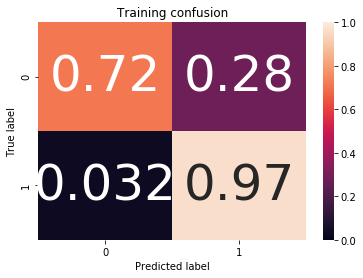

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')